In [1]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from analysis.plot_matplotlib import plot_hist
from analysis.mc import BinnedImportanceSamplingIntegrator
from analysis import tnp, tnp_mode
import pandas as pd

tnp_mode(1);

# N-dimensional Gaussian

In [2]:
from typing import Optional

def create_peaks(min, max, n_dims:int, n_peaks:Optional[int]=None):
    if n_peaks is None:
        n_peaks = n_dims
    
    peak_locs = ((min+tnp.arange(n_peaks)*(max-min)/(n_peaks-1)) * tnp.ones((1, n_dims)).T).T
    return peak_locs

peaks = create_peaks(1, 10, 10)
print(peaks)

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
        [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.],
        [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]])


In [3]:
# (n, m); where n=n_dims, m=n_samples

In [4]:
def integrand_n(args, peaks, a:float=-10.):
    n_samples = args.shape[1]
    n_peaks = len(peaks)
    
    res = tnp.zeros(n_samples)
    for i in range(n_peaks):
        b = (args.T - peaks[i])
        b = tnp.prod(b**2, axis=1)
        
        res += tnp.exp(a*b)
        
        #res += tnp.exp(-(10)*((args[0]-2)**2)*(args[1]-2)**2)
    
    return res

def integrand_2_n(args):
    r1_2 = (args[0]-2)**2 + (args[1]-2)**2
    r2_2 = (args[0]-4)**2 + (args[1]-4)**2
    
    return tnp.exp(-(10)*r1_2) + tnp.exp(-(10)*r2_2)

peaks_2d = create_peaks(1, 5, 2, 3)
integrand_2d = lambda args: integrand_n(args, peaks_2d, a=-50)

In [3]:
# (n, m); where n=n_dims, m=n_samples

In [41]:
### Example: n=2

namespace(arange=<function torch._VariableFunctionsClass.arange>,
          array=<function torch._VariableFunctionsClass.tensor>,
          prod=<function analysis.tnp.tnp.<lambda>(tensor, axis=0)>,
          trapz=<function torch._VariableFunctionsClass.trapezoid>,
          argsort=<function torch._VariableFunctionsClass.argsort>,
          sum=<function torch._VariableFunctionsClass.sum>,
          exp=<function torch._VariableFunctionsClass.exp>,
          stack=<function torch._VariableFunctionsClass.stack>,
          ones=<function torch._VariableFunctionsClass.ones>,
          zeros=<function torch._VariableFunctionsClass.zeros>,
          random=namespace(choice=<function analysis.tnp.tnp.<lambda>(vals, size)>,
                           uniform=<function analysis.tnp.tnp.<lambda>(low, high)>))

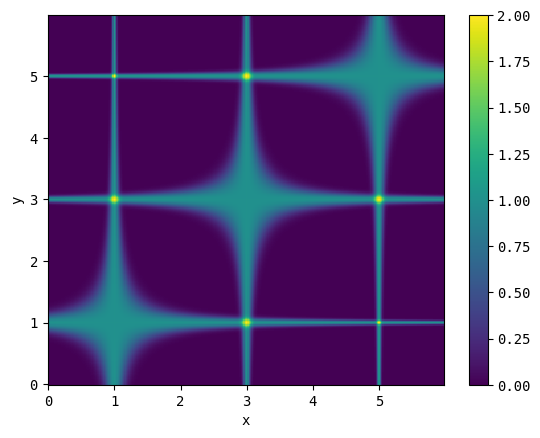

In [42]:
n_dims = 2
n_peaks = 3

boundaries = [
    [0, 6],
    [0, 6]
]

x = tnp.arange(boundaries[0][0], boundaries[0][1], 0.02)
y = tnp.arange(boundaries[1][0], boundaries[1][1], 0.02)
args = tnp.array(np.meshgrid(x, y)).reshape(n_dims, len(x)*len(y))
z = integrand_2d(args)

plt.pcolormesh(x, y, z.reshape(len(x), len(y)))
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

In [43]:
bins_per_dim = 30
instance = BinnedImportanceSamplingIntegrator(bins_per_dim, integrand_2d, n_dims, boundaries)

C:\DevRepositories\MEM_HEP\analysis\mc\BinnedImportanceSamplingIntegrator.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.bin_bounds = tnp.array(tnp.array(bin_bounds))


tensor(2.8119) tensor(5.0000)


(array([0.16710741, 0.16795743, 0.16485728, 0.16730744, 0.16200716,
        0.16330726, 0.16085715, 0.16515725, 0.16965754, 0.16570737,
        0.16760735, 0.17055769, 0.16670731, 0.16920742, 0.17380783,
        0.16325716, 0.17200755, 0.16505744, 0.16575727, 0.16710733,
        0.16775736, 0.16630769, 0.16830738, 0.16805737, 0.16540726,
        0.16440721, 0.16465722, 0.16820778, 0.16550726, 0.16660731]),
 array([5.30958168e-05, 2.00044230e-01, 4.00035381e-01, 6.00026548e-01,
        8.00017655e-01, 1.00000882e+00, 1.19999993e+00, 1.39999104e+00,
        1.59998226e+00, 1.79997337e+00, 1.99996448e+00, 2.19995570e+00,
        2.39994669e+00, 2.59993792e+00, 2.79992914e+00, 2.99992013e+00,
        3.19991136e+00, 3.39990258e+00, 3.59989357e+00, 3.79988480e+00,
        3.99987602e+00, 4.19986725e+00, 4.39985800e+00, 4.59984922e+00,
        4.79984045e+00, 4.99983168e+00, 5.19982290e+00, 5.39981413e+00,
        5.59980488e+00, 5.79979610e+00, 5.99978733e+00]),
 <BarContainer object of 30 

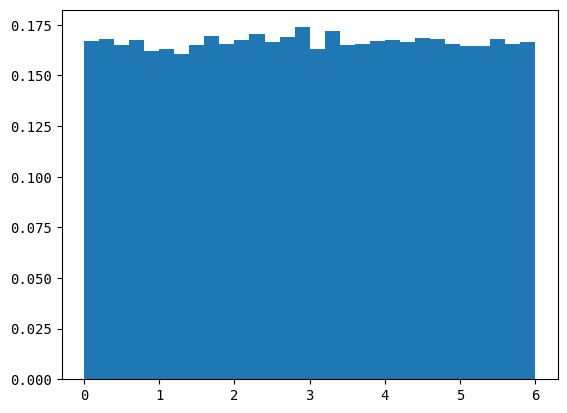

In [44]:
print(instance.integrate(10000), instance.importance_per_dim(0).sum())
n_tries = 1000

res_raw = []
for i in range(n_tries):
    res_raw.append(instance.integrate(100))

if tnp_mode():
    res_raw = torch.stack(res_raw).numpy()

n_samples = 100000
samples = instance.sample(n_samples)
plt.hist(samples[0], density=True, bins=bins_per_dim)
# sns.scatterplot(x=samples[0], y=integrand(samples))

#plt.hist(res_raw, bins=32)
#plt.title(rf"$I={np.average(res_raw):0.2f}\pm{np.std(res_raw):0.2f}$")

In [19]:
instance.adapt()

tensor(2.8117) tensor(17.0855)


(array([0.05870211, 0.05960215, 0.07200258, 0.11945431, 0.47656721,
        0.46536681, 0.13125466, 0.09365338, 0.07230261, 0.06425228,
        0.06640244, 0.08345296, 0.08575305, 0.12870473, 0.51981847,
        0.5256693 , 0.13980497, 0.07820278, 0.07815287, 0.07145254,
        0.07280267, 0.07635262, 0.08330306, 0.13385491, 0.46246698,
        0.47566633, 0.12205448, 0.06615243, 0.05710196, 0.0598522 ]),
 array([1.85857425e-04, 2.00178668e-01, 4.00171459e-01, 6.00164294e-01,
        8.00157070e-01, 1.00014985e+00, 1.20014262e+00, 1.40013552e+00,
        1.60012829e+00, 1.80012107e+00, 2.00011396e+00, 2.20010662e+00,
        2.40009952e+00, 2.60009241e+00, 2.80008507e+00, 3.00007796e+00,
        3.20007062e+00, 3.40006351e+00, 3.60005641e+00, 3.80004907e+00,
        4.00004196e+00, 4.20003462e+00, 4.40002775e+00, 4.60002041e+00,
        4.80001307e+00, 5.00000572e+00, 5.19999886e+00, 5.39999151e+00,
        5.59998417e+00, 5.79997730e+00, 5.99996996e+00]),
 <BarContainer object of 30 

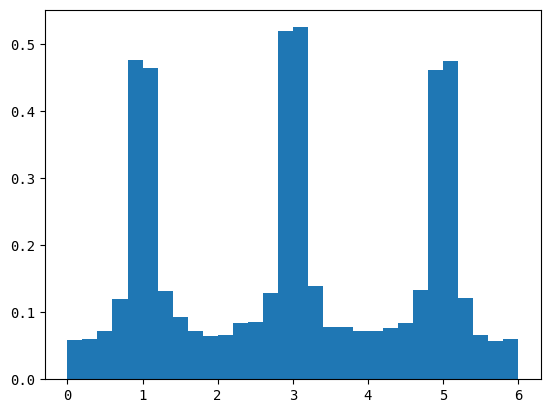

In [20]:
print(instance.integrate(10000), instance.importance_per_dim(0).sum())

res_final = []
for i in range(n_tries):
    res_final.append(instance.integrate(100))

if tnp_mode():
    res_final = torch.stack(res_final).numpy()

n_samples = 100000
samples = instance.sample(n_samples)
plt.hist(samples[0], density=True, bins=bins_per_dim)
# sns.scatterplot(x=samples[0], y=integrand(samples))

#plt.hist(res_raw, bins=32)
#plt.title(rf"$I={np.average(res_raw):0.2f}\pm{np.std(res_raw):0.2f}$")

Ratio of σ: 1.81 Ratio of μ: 1.00


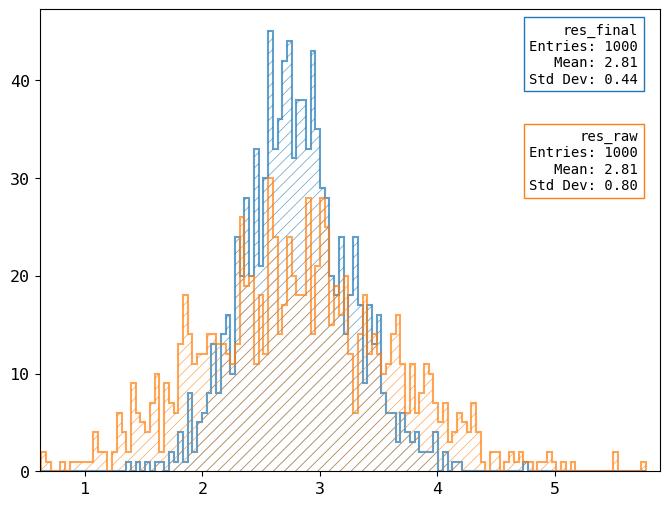

In [21]:
print(f"Ratio of σ: {np.std(res_raw)/np.std(res_final):0.2f}",
      f"Ratio of μ: {np.average(res_raw)/np.average(res_final):0.2f}")

plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

# 3D example

In [35]:
tnp_mode(1);

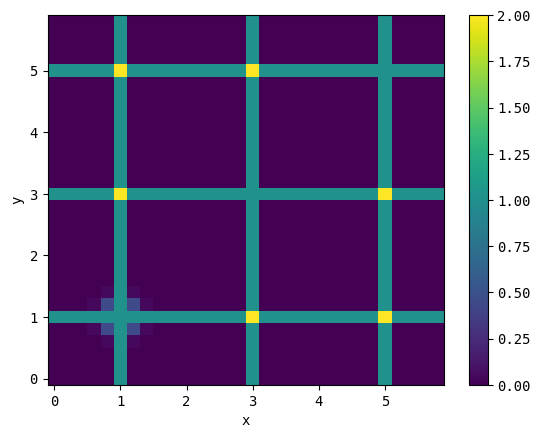

In [36]:
n_dims = 3
n_peaks = 3

peaks_3d = create_peaks(1, 5, n_dims, n_peaks)
integrand_3d = lambda args: integrand_n(args, peaks_3d, a=-500)

boundaries = [
    [0, 6],
    [0, 6],
    [0, 6]
]

x = tnp.arange(boundaries[0][0], boundaries[0][1], 0.2)
y = tnp.arange(boundaries[1][0], boundaries[1][1], 0.2)
z = tnp.arange(boundaries[2][0], boundaries[2][1], 0.2)
#print(tnp.array(np.meshgrid(x, y, z)).shape, len(x))
args = tnp.array(np.meshgrid(x, y, z)).reshape(n_dims, len(x)*len(y)*len(z))
res = integrand_3d(args)

# Show 2d slice
plt.pcolormesh(x, y, res.reshape(len(x), len(y), len(z))[:, :, 0])
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

[[[0.  0.2]
  [0.2 0.4]
  [0.4 0.6]
  [0.6 0.8]
  [0.8 1. ]
  [1.  1.2]
  [1.2 1.4]
  [1.4 1.6]
  [1.6 1.8]
  [1.8 2. ]
  [2.  2.2]
  [2.2 2.4]
  [2.4 2.6]
  [2.6 2.8]
  [2.8 3. ]
  [3.  3.2]
  [3.2 3.4]
  [3.4 3.6]
  [3.6 3.8]
  [3.8 4. ]
  [4.  4.2]
  [4.2 4.4]
  [4.4 4.6]
  [4.6 4.8]
  [4.8 5. ]
  [5.  5.2]
  [5.2 5.4]
  [5.4 5.6]
  [5.6 5.8]
  [5.8 6. ]]

 [[0.  0.2]
  [0.2 0.4]
  [0.4 0.6]
  [0.6 0.8]
  [0.8 1. ]
  [1.  1.2]
  [1.2 1.4]
  [1.4 1.6]
  [1.6 1.8]
  [1.8 2. ]
  [2.  2.2]
  [2.2 2.4]
  [2.4 2.6]
  [2.6 2.8]
  [2.8 3. ]
  [3.  3.2]
  [3.2 3.4]
  [3.4 3.6]
  [3.6 3.8]
  [3.8 4. ]
  [4.  4.2]
  [4.2 4.4]
  [4.4 4.6]
  [4.6 4.8]
  [4.8 5. ]
  [5.  5.2]
  [5.2 5.4]
  [5.4 5.6]
  [5.6 5.8]
  [5.8 6. ]]

 [[0.  0.2]
  [0.2 0.4]
  [0.4 0.6]
  [0.6 0.8]
  [0.8 1. ]
  [1.  1.2]
  [1.2 1.4]
  [1.4 1.6]
  [1.6 1.8]
  [1.8 2. ]
  [2.  2.2]
  [2.2 2.4]
  [2.4 2.6]
  [2.6 2.8]
  [2.8 3. ]
  [3.  3.2]
  [3.2 3.4]
  [3.4 3.6]
  [3.6 3.8]
  [3.8 4. ]
  [4.  4.2]
  [4.2 4.4]
  [4.4 4.6]


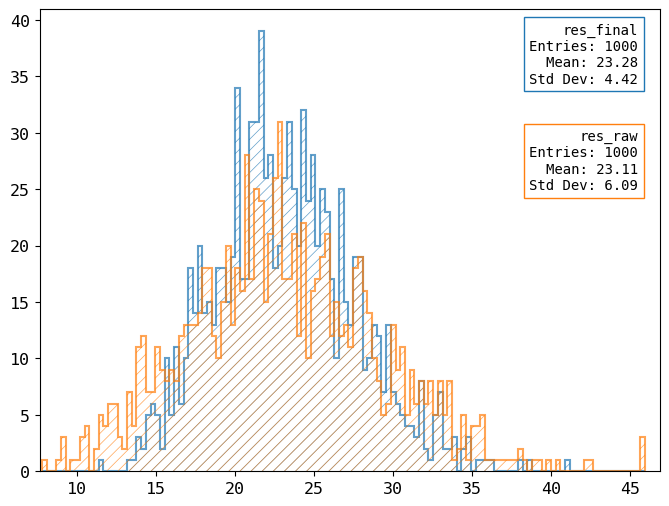

In [37]:
n_samples = 100000
bins_per_dim = 30

instance = BinnedImportanceSamplingIntegrator(bins_per_dim, integrand_3d, n_dims, boundaries)

res_raw = []
res_final = []

for i in range(n_tries):
    res_raw.append(instance.integrate(100))

instance.adapt()

for i in range(n_tries):
    res_final.append(instance.integrate(100))

if tnp_mode():
    res_raw = torch.stack(res_raw).numpy()
    res_final = torch.stack(res_final).numpy()
    
print(f"Ratio of σ: {np.std(res_raw)/np.std(res_final):0.3f}",
      f"Ratio of μ: {np.average(res_raw)/np.average(res_final):0.3f}")

plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

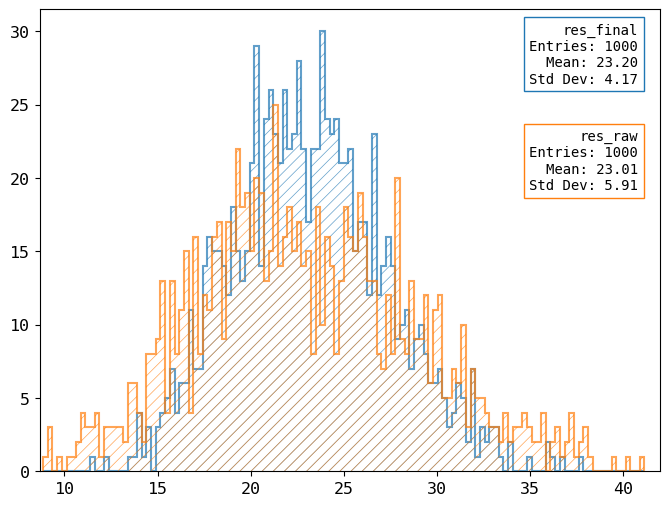

In [156]:
plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

# 10D example

In [40]:
tnp_mode(1);

In [45]:
n_dims = 10
n_peaks = 10

peaks_10d = create_peaks(1, 10, n_dims, n_peaks)
integrand = lambda args: integrand_n(args, peaks_10d, a=-500)

boundaries = [[0, 11] for i in range(n_dims)]

In [46]:
n_tries = 1000
bins_per_dim = 20
instance = BinnedImportanceSamplingIntegrator(bins_per_dim, integrand, n_dims, boundaries)

[[[ 0.    0.55]
  [ 0.55  1.1 ]
  [ 1.1   1.65]
  [ 1.65  2.2 ]
  [ 2.2   2.75]
  [ 2.75  3.3 ]
  [ 3.3   3.85]
  [ 3.85  4.4 ]
  [ 4.4   4.95]
  [ 4.95  5.5 ]
  [ 5.5   6.05]
  [ 6.05  6.6 ]
  [ 6.6   7.15]
  [ 7.15  7.7 ]
  [ 7.7   8.25]
  [ 8.25  8.8 ]
  [ 8.8   9.35]
  [ 9.35  9.9 ]
  [ 9.9  10.45]
  [10.45 11.  ]]

 [[ 0.    0.55]
  [ 0.55  1.1 ]
  [ 1.1   1.65]
  [ 1.65  2.2 ]
  [ 2.2   2.75]
  [ 2.75  3.3 ]
  [ 3.3   3.85]
  [ 3.85  4.4 ]
  [ 4.4   4.95]
  [ 4.95  5.5 ]
  [ 5.5   6.05]
  [ 6.05  6.6 ]
  [ 6.6   7.15]
  [ 7.15  7.7 ]
  [ 7.7   8.25]
  [ 8.25  8.8 ]
  [ 8.8   9.35]
  [ 9.35  9.9 ]
  [ 9.9  10.45]
  [10.45 11.  ]]

 [[ 0.    0.55]
  [ 0.55  1.1 ]
  [ 1.1   1.65]
  [ 1.65  2.2 ]
  [ 2.2   2.75]
  [ 2.75  3.3 ]
  [ 3.3   3.85]
  [ 3.85  4.4 ]
  [ 4.4   4.95]
  [ 4.95  5.5 ]
  [ 5.5   6.05]
  [ 6.05  6.6 ]
  [ 6.6   7.15]
  [ 7.15  7.7 ]
  [ 7.7   8.25]
  [ 8.25  8.8 ]
  [ 8.8   9.35]
  [ 9.35  9.9 ]
  [ 9.9  10.45]
  [10.45 11.  ]]

 [[ 0.    0.55]
  [ 0.55  1.1 ]
  

In [49]:
print(instance.integrate(10000), instance.importance_per_dim(0).sum())

res_raw = []
for i in range(n_tries):
    res_raw.append(instance.integrate(100))

if tnp_mode():
    res_raw = torch.stack(res_raw).numpy()

#plt.hist(res_raw, bins=32)
#plt.title(rf"$I={np.average(res_raw):0.2f}\pm{np.std(res_raw):0.2f}$")

tensor(7.0118e+08, dtype=torch.float64) tensor(1.8182, dtype=torch.float64)


(array([0.09193034, 0.09162124, 0.08945753, 0.08962117, 0.09014846,
        0.09183943, 0.09033029, 0.09113031, 0.09129395, 0.08918479,
        0.09153033, 0.09105758, 0.0917667 , 0.09120304, 0.09102122,
        0.09251218, 0.0901121 , 0.09111213, 0.09194852, 0.08942116]),
 array([1.72927976e-04, 5.50154581e-01, 1.10013623e+00, 1.65011789e+00,
        2.20009954e+00, 2.75008119e+00, 3.30006285e+00, 3.85004450e+00,
        4.40002615e+00, 4.95000781e+00, 5.49998946e+00, 6.04997111e+00,
        6.59995277e+00, 7.14993442e+00, 7.69991607e+00, 8.24989773e+00,
        8.79987938e+00, 9.34986103e+00, 9.89984269e+00, 1.04498243e+01,
        1.09998060e+01]),
 <BarContainer object of 20 artists>)

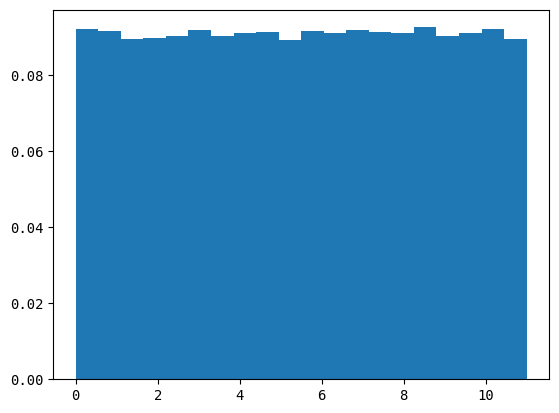

In [50]:
n_samples = 100000
samples = instance.sample(n_samples)
plt.hist(samples[0], density=True, bins=bins_per_dim)
# sns.scatterplot(x=samples[0], y=integrand(samples))

In [53]:
instance.adapt()

(array([0.05252796, 0.05620074, 0.06814635, 0.08916481, 0.08085561,
        0.1080196 , 0.09376487, 0.12700167, 0.1165288 , 0.11251057,
        0.10878325, 0.11938339, 0.12203797, 0.09638308, 0.10803778,
        0.07416461, 0.08616477, 0.0754919 , 0.06501904, 0.05801894]),
 array([1.27005412e-04, 5.50119779e-01, 1.10011255e+00, 1.65010533e+00,
        2.20009810e+00, 2.75009087e+00, 3.30008365e+00, 3.85007642e+00,
        4.40006920e+00, 4.95006197e+00, 5.50005474e+00, 6.05004752e+00,
        6.60004029e+00, 7.15003307e+00, 7.70002584e+00, 8.25001861e+00,
        8.80001139e+00, 9.35000416e+00, 9.89999693e+00, 1.04499897e+01,
        1.09999825e+01]),
 <BarContainer object of 20 artists>)

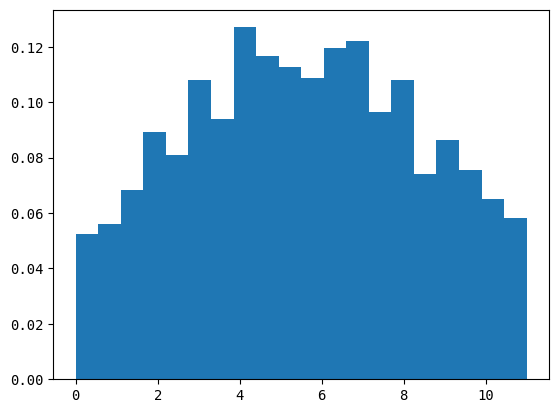

In [52]:
samples = instance.sample(n_samples)
plt.hist(samples[0], density=True, bins=bins_per_dim)
# sns.scatterplot(x=samples[0], y=integrand(samples))

In [54]:
print(instance.integrate(10000), instance.importance_per_dim(0).sum())

res_final = []
for i in range(n_tries):
    res_final.append(instance.integrate(100))

if tnp_mode():
    res_final = torch.stack(res_final).numpy()

tensor(6.4689e+08, dtype=torch.float64) tensor(2.0777, dtype=torch.float64)


Ratio of σ: 0.512 Ratio of μ: 1.030


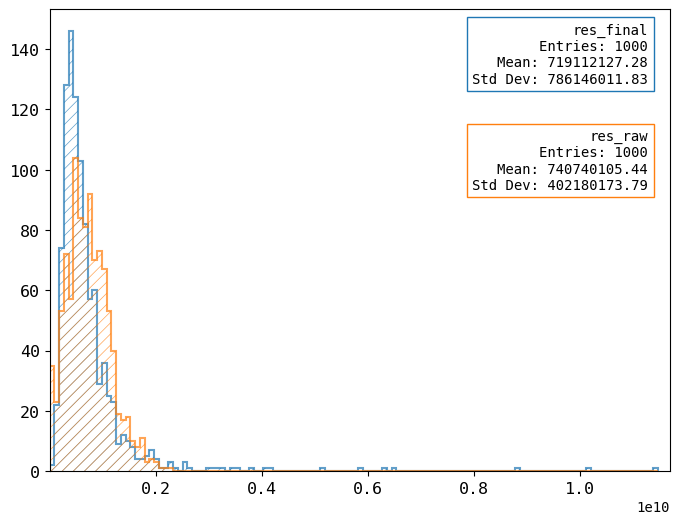

In [55]:
print(f"Ratio of σ: {np.std(res_raw)/np.std(res_final):0.3f}",
      f"Ratio of μ: {np.average(res_raw)/np.average(res_final):0.3f}")

plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

Ratio of σ: 0.647 Ratio of μ: 1.044


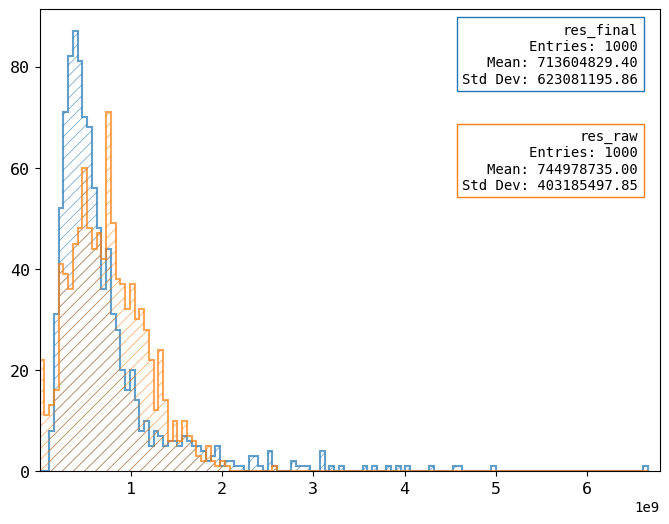

In [195]:
print(f"Ratio of σ: {np.std(res_raw)/np.std(res_final):0.3f}",
      f"Ratio of μ: {np.average(res_raw)/np.average(res_final):0.3f}")

plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

# NF example

In [5]:
from analysis.mc import ImportanceSamplingIntegrator

In [6]:
class NFlowImportanceSamplingIntegrator(ImportanceSamplingIntegrator):
    def __init__(self, model, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.model = model
        
    def sample(self, n_samples:int=1, with_importance:bool=False):
        pass
    
    def adapt(self, n_samples:int=1000000):
        self.adapted = True
        pass

In [7]:
# Physics
#from analysis.cffi.mg5.lib import mc_batch, mc_batch_sigma
from analysis.import_data import import_true_reco
from analysis.nis.distributions import HyperUniform
import numpy as np
import pandas as pd

In [9]:
from normflows.distributions import BaseDistribution
class HyperUniform(BaseDistribution):
    """
    Multivariate uniform distribution
    """

    def __init__(self, low, high, dtype=torch.float, device:Optional[str]=None):
        """Constructor

        Args:
          low: Lower bound of uniform distribution
          high: Upper bound of uniform distribution
        """
        
        low = torch.tensor(low).to(dtype)
        high = torch.tensor(high).to(dtype)
        
        if device is not None:
            low = low.to(device)
            high = high.to(device)
        
        assert(low.shape == high.shape)
        
        shape = low.shape[0]
        
        super().__init__()
        if isinstance(shape, int):
            shape = (shape,)
        if isinstance(shape, list):
            shape = tuple(shape)
            
        self.shape = shape
        self.d = np.prod(shape)
        self.low = low
        self.high = high
        self.log_prob_val = -torch.sum(torch.log(self.high - self.low))

    def forward(self, num_samples=1, context=None):
        eps = torch.rand(
            (num_samples,) + self.shape, dtype=self.low.dtype, device=self.low.device
        )
        z = self.low + (self.high - self.low) * eps
        log_p = self.log_prob_val * torch.ones(num_samples, device=self.low.device)
        return z, log_p

    def log_prob(self, z, context=None):
        return torch.ones(z.shape[0], device=z.device)
        log_p = self.log_prob_val * torch.ones(z.shape[0], device=z.device)
        out_range = torch.logical_or(z < self.low, z > self.high)
        ind_inf = torch.any(torch.reshape(out_range, (z.shape[0], -1)), dim=-1)
        log_p[ind_inf] = -np.inf
        return log_p

In [262]:
import normflows as nf
import torch
from typing import Optional, Callable

def print_model_summary(model):
    print(
        'Model: %s\nParameters: %i' %
        (model, sum(p.numel() for p in model.parameters()))
    )

def get_nfm(q0:Optional[BaseDistribution]=None,
            K:int = 16,
            latent_size:int = 2,
            hidden_units: int = 256,
            hidden_layers:int = 2,
            cuda_if_available:bool = True,
            flow:Callable = nf.flows.AutoregressiveRationalQuadraticSpline,
            linear_permute:bool = True,
            flow_args:dict = {'num_bins': 30,},
            seed:Optional[int]=None):
    
    if seed is not None:
        torch.manual_seed(seed)

    flows = []
    for i in range(K):
        flows += [flow(latent_size, hidden_layers, hidden_units, **flow_args)]
        if linear_permute:
            flows += [nf.flows.LULinearPermute(latent_size)]

    # Set base distribuiton
    if q0 is None:
        #q0 = nf.distributions.DiagGaussian(latent_size, trainable=False)
        q0 = nf.distributions.Uniform(latent_size)
        
    # Construct flow model
    nfm = nf.NormalizingFlow(q0=q0, flows=flows)

    print("Using device " + f"GPU ({torch.cuda.get_device_name(0)})" if torch.cuda.is_available() else "CPU")
    print(f"Model with {sum(p.numel() for p in nfm.parameters())} parameters")
    
    # Move model on GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() and cuda_if_available else 'cpu')
    return nfm.to(device)

In [263]:
low=[-2,-2]
high=[2, 2]

(array([[27., 17., 24., ..., 24., 29., 29.],
        [28., 13., 30., ..., 20., 18., 27.],
        [30., 26., 28., ..., 24., 22., 15.],
        ...,
        [23., 22., 23., ..., 25., 24., 14.],
        [26., 24., 21., ..., 25., 18., 28.],
        [26., 28., 32., ..., 24., 24., 36.]]),
 array([-1.99992371e+00, -1.93742632e+00, -1.87492894e+00, -1.81243156e+00,
        -1.74993418e+00, -1.68743680e+00, -1.62493942e+00, -1.56244204e+00,
        -1.49994466e+00, -1.43744728e+00, -1.37494989e+00, -1.31245251e+00,
        -1.24995513e+00, -1.18745775e+00, -1.12496037e+00, -1.06246299e+00,
        -9.99965608e-01, -9.37468227e-01, -8.74970846e-01, -8.12473465e-01,
        -7.49976084e-01, -6.87478703e-01, -6.24981321e-01, -5.62483940e-01,
        -4.99986559e-01, -4.37489178e-01, -3.74991797e-01, -3.12494416e-01,
        -2.49997035e-01, -1.87499654e-01, -1.25002272e-01, -6.25048913e-02,
        -7.51018524e-06,  6.24898709e-02,  1.24987252e-01,  1.87484633e-01,
         2.49982014e-01,  3.124

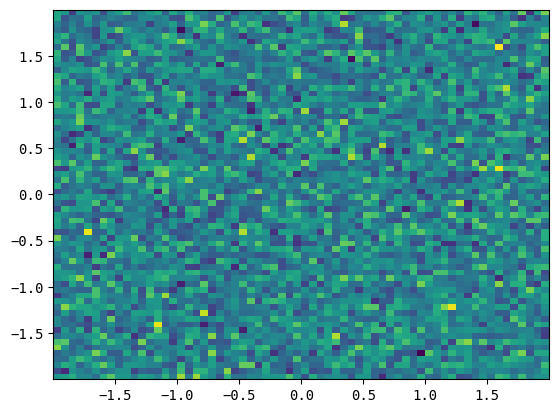

In [264]:
#a = HyperUniform(low=[-2,-2], high=[2, 2], trainable=False)
a = nf.distributions.base.Uniform(2, low=-2., high=2.)

z = a.sample(100000)

pX = z.T[0].detach().cpu().numpy()
pY = z.T[1].detach().cpu().numpy()

plt.hist2d(pX, pY, bins=(64,64))

In [265]:
def plot_proposal(nfm, n_samples:int=1024):
    cs = nfm.sample(n_samples)
    samples = cs[0].detach().cpu().numpy()

    all_max = np.max(samples).max()
    all_min = np.min(samples).min()
    #print((all_min, all_max))

    plot_hist(pd.DataFrame(dict(x=samples.T[0], y=samples.T[1])), normalize=True, xlim=(all_min, all_max), xlim_binning=(all_min, all_max))
    if False:
        fig, ax = plt.subplots()
        ax.set_title("q0")
        for i in range(len(samples.T)):
            ax.hist(samples.T[i], alpha=0.4, label=f"Dim {i}",
                    bins=64, range=(all_min, all_max))
            ax.set_xlim(all_min, all_max)
        ax.legend()
        
def plot_integrand(nfm, func, n_samples:int=2048, vwindow=None,
                   is_nfm:bool=True, y_log:bool=False):
    if is_nfm:
        samples, log_p = nfm.sample(n_samples)
    else:
        samples = nfm.sample(n_samples)
    
    #samples = samples.detach().cpu().numpy()
    results = func(samples).detach().cpu().numpy()
    
    for i in range(len(samples.T)):
        fig, ax = plt.subplots()
        #ax.hist(samples.T[i], alpha=0.4, label=f"Dim {i}", bins=64)
        ax.scatter(x=samples.T[i].detach().cpu().numpy(),
                y=results)
        
        if vwindow is not None:
            if len(vwindow) > 2 and len(vwindow) == len(samples.T):
                ax.set_ylim(vwindow[i])
            else:
                ax.set_ylim(vwindow)
            
        ax.set_title('Integrand projection')
        ax.set_xlabel(f"Dim {i}")
        ax.set_ylabel('Integrand value')
        plt.show()
    
    fig, ax = plt.subplots()
    ax.hist(results, bins=32)
    ax.set_xlabel('Integrand value')
    if y_log:
        ax.set_yscale('log')
    ax.set_title('All results')
    
def get_result(nfm, func:Callable, n_samples:int=1024, is_nfm:bool=True):
    if is_nfm:
        samples, log_p = nfm.sample(n_samples)
        prob = log_p.exp().detach()#.cpu().numpy()
    else:
        samples = nfm.sample(n_samples)
        prob = torch.ones(n_samples) * nfm.log_prob_val.exp()
    
    res = func(samples)/prob
    
    integral = (1/n_samples * res.sum()).detach().cpu().numpy().item()
    delta = (torch.var(res).detach().cpu()/n_samples).sqrt().numpy().item()
    
    return integral, delta

CPU
Model with 1430400 parameters


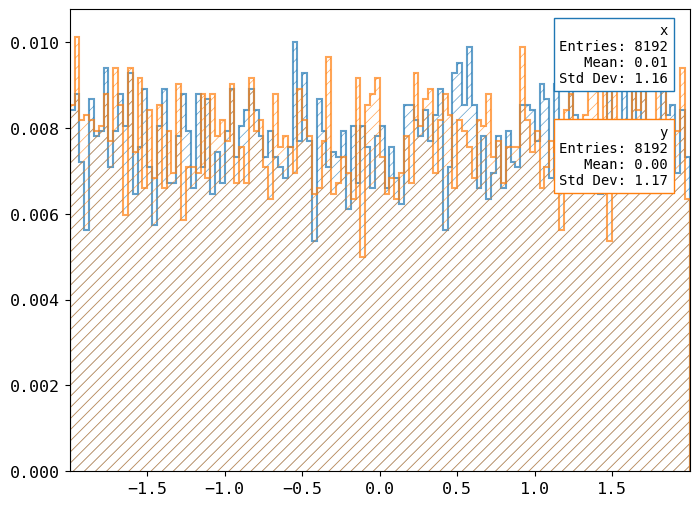

In [308]:
nfm = get_nfm(q0=a, hidden_units=128)
plot_proposal(nfm, n_samples=8192)

In [309]:
def func(args):
    return torch.exp(-1*torch.sqrt(args.T[0]**2 + args.T[1]**2))
    #return args.T[0]**3 + torch.exp(-10* args.T[1]**2)

In [310]:
get_result(a, func, is_nfm=False, n_samples=10000)

(4.102997779846191, 0.02569471299648285)

In [313]:
get_result(nfm, func)

(4.040805816650391, 0.079429030418396)

In [314]:
samples, log_p = nfm.sample(1000)
results = func(samples).detach().cpu().numpy()

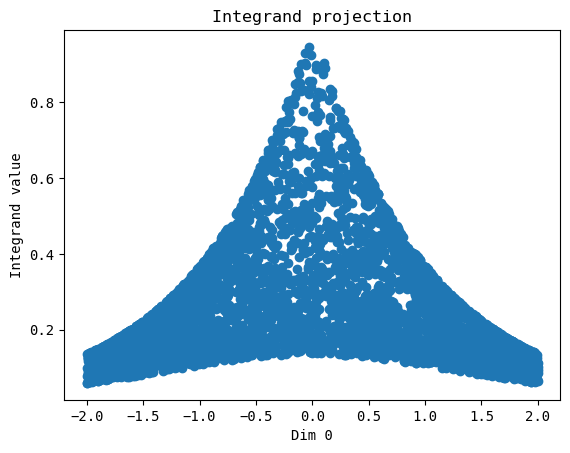

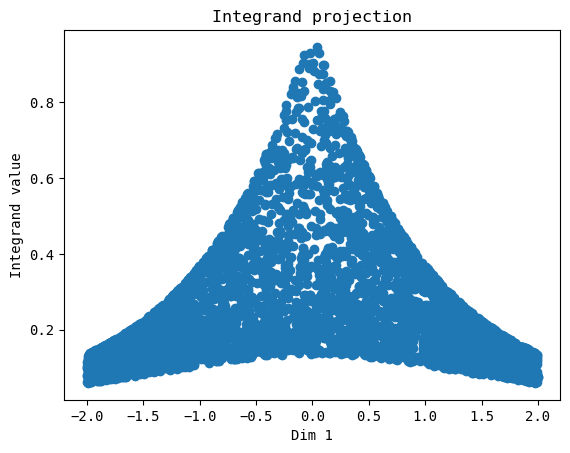

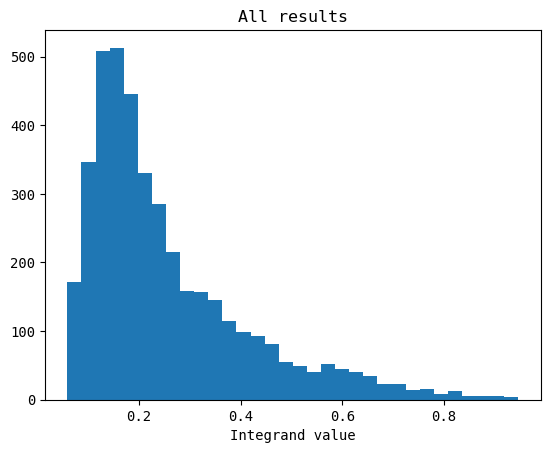

In [315]:
plot_integrand(nfm, func, n_samples=4096)

In [316]:
def train_iflow(nfm, func, n_samples:int=10000, n_epochs:int=20):
    optimizer = torch.optim.Adam(nfm.parameters(), lr=1e-3)
    for i in range(n_epochs):
        optimizer.zero_grad()
        
        z, logq = nfm.q0(n_samples)
        true = torch.abs(func(z)).detach()
        logp = torch.where(true > 1e-16, true.log(), true + 1e-16).detach()
        
        # Transform through NFlow
        for flow in nfm.flows:
            z, log_det = flow(z)
            logq -= log_det
        
        test = logq.exp().detach()
        
        mean = torch.mean(true/test)
        var = torch.var(true/test)
        
        true = true/mean
        loss = (1/n_samples) * ((true/test) * (logp - logq)**2).sum()
        
        loss.backward()
        optimizer.step()
        
        #if i % 10 == 0:
        print(f"Epoch {i}: {loss.item()} | Var {var}")
        
def train_backward(nfm, func, n_samples:int=32000, n_epochs:int=10):
    optimizer = torch.optim.Adam(nfm.parameters(), lr=1e-3)
    p = nfm.q0.log_prob_val.exp()
    
    for i in range(n_epochs):
        optimizer.zero_grad()
        samples, log_p = nfm.sample(n_samples)
        
        prob = log_p.exp()
        results = func(samples).detach()
        
        loss = (1/n_samples * (1/(p*prob)) * results**2).sum()
        loss.backward()
        optimizer.step()
        
        #if i % 10 == 0:
        print(f"Epoch {i}: {loss.item()}")

In [317]:
#train_forward(nfm, func, n_epochs=10)
train_iflow(nfm, func, n_epochs=10)

Epoch 0: 2.866243362426758 | Var 6.73154354095459 | Loss 2.866243362426758
Epoch 1: 0.15270757675170898 | Var 0.16128508746623993 | Loss 0.15270757675170898
Epoch 2: 1.5556811094284058 | Var 0.016869818791747093 | Loss 1.5556811094284058
Epoch 3: 0.6326698064804077 | Var 0.03832739591598511 | Loss 0.6326698064804077
Epoch 4: 0.1989288032054901 | Var 0.15812790393829346 | Loss 0.1989288032054901
Epoch 5: 0.3276754319667816 | Var 0.3832622170448303 | Loss 0.3276754319667816
Epoch 6: 0.4510439336299896 | Var 0.5334098935127258 | Loss 0.4510439336299896
Epoch 7: 0.38123655319213867 | Var 0.434926301240921 | Loss 0.38123655319213867
Epoch 8: 0.33586233854293823 | Var 0.4051491618156433 | Loss 0.33586233854293823
Epoch 9: 0.23883624374866486 | Var 0.26601168513298035 | Loss 0.23883624374866486


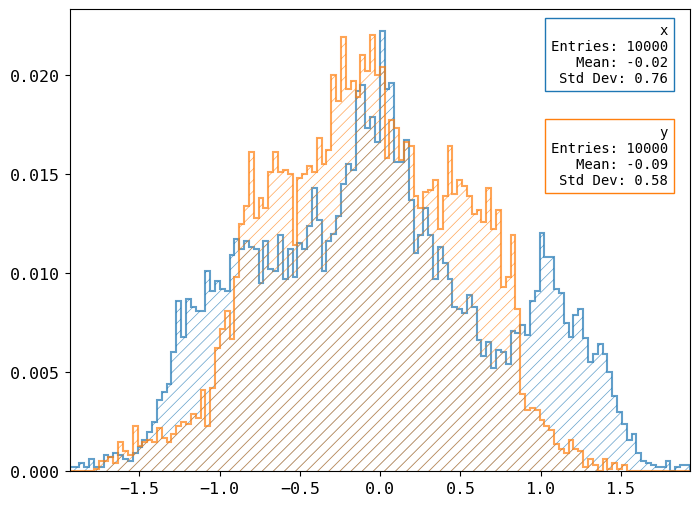

In [318]:
plot_proposal(nfm, n_samples=10000)

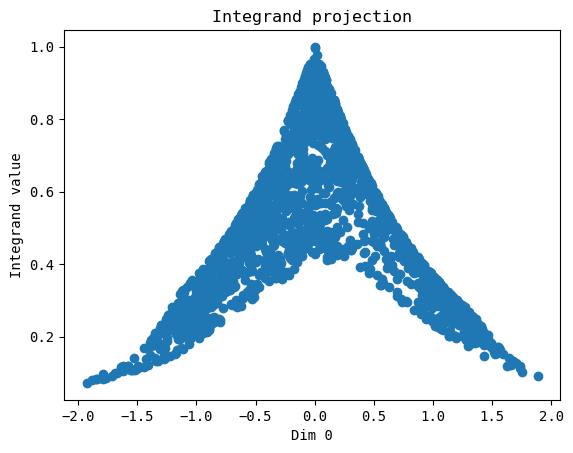

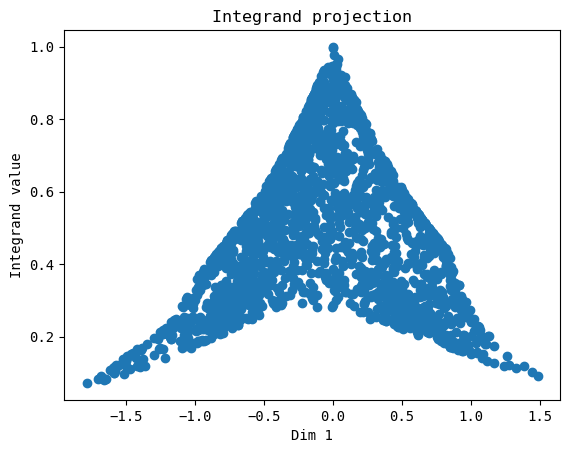

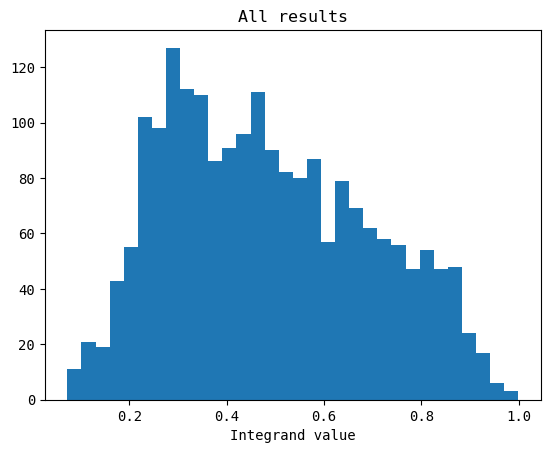

In [319]:
plot_integrand(nfm, func, y_log=False)

In [326]:
get_result(nfm, func, n_samples=100000)

In [323]:
n_samples = 100

samples, logq = nfm.sample(n_samples)
true = torch.abs(func(samples.detach()))
test = logq.exp()
mean = torch.mean(true/test)
var = torch.var(true/test)

print(mean, torch.sqrt(var/(n_samples-1.)).item())

tensor(2.2091, grad_fn=<MeanBackward0>) 0.14799189567565918
